# Finding Customer Insights

---
 Needed to answer or explore things as below :

*   What is the overall customer response?
*   Which group of customers are loyal?
*   Segmenting customers and their personality
*   Predicting next promotion response


# Data wrangling



*   Importing data set from my github repository
*   Explore Data and description
*   Identify and handle missing values
*   Data Formating
*   Data Standardization & normalization







In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://github.com/mdimran1/Dataset/blob/main/marketing_campaign.csv?raw=true', sep='\t') 


## Explore data and feature description







<b>Dataset contains total 2240 records and 29 features. Target column or 

feature is response which indicates binary records of the latest promotion that customers has been taken. Primary Feature decription are as below :</b>



0   ID : Customer's unique identity

1   Year_Birth : Customer's birth year & easy to find age

2   Education : Maximum education level

3   Marital_Status : married or others

4   Income : Amount of earning, Needed to normalize or binning 

5   Kidhome : No. of kids [ according google teen ages = under 12]

6   Teenhome : No. of teens [ according google teen ages = 13 to 19]

7   Dt_Customer : When customers are envolved

8   Recency : count of days last ordered

9   MntWines : Total amount as spent on wine

10   MntFruits : Total amount as spent on Fruits

11   MntMeatProducts : Total amount as spent on Meat

12   MntFishProducts : Total amount as spent on Fish

13   MntSweetProducts : Total amount as spent on Sweet

14   MntGoldProds : Total amount as spent on Gold

15   NumDealsPurchases : Counts of purchases with discount

16   NumWebPurchases : purchased by company’s web site

17   NumCatalogPurchases : Number of purchases made using a catalogue

18   NumStorePurchases : Number of purchases from store

19   NumWebVisitsMonth : Number of visits to company’s web site 

20   AcceptedCmp3 : Does customer accepted the offer campaign 3?

21   AcceptedCmp4 : Does customer accepted the offer campaign 4?

22   AcceptedCmp5 : Does customer accepted the offer campaign 5?

23   AcceptedCmp1 : Does customer accepted the offer campaign 1?

24   AcceptedCmp2 : Does customer accepted the offer campaign 2?

25   Complain : Has any cpmplain? (1 or 0)

26   Z_CostContact : This feature has constant 3 only

27   Z_Revenue : This feature has constant 11 only

28   Response: Target feature

In [2]:
# data sample with both top & last 5 records
data.head(-5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [3]:
# total rows and columns
print(f'Total rows : {data.shape[0]}')
print(f'Total columns : {data.shape[1]}') 

Total rows : 2240
Total columns : 29


In [4]:
# data information with data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### column values summery

In [5]:
# explore column values
for i in data.columns:
  print (f"{i}: {data[i].nunique()}")
  print()


ID: 2240

Year_Birth: 59

Education: 5

Marital_Status: 8

Income: 1974

Kidhome: 3

Teenhome: 3

Dt_Customer: 663

Recency: 100

MntWines: 776

MntFruits: 158

MntMeatProducts: 558

MntFishProducts: 182

MntSweetProducts: 177

MntGoldProds: 213

NumDealsPurchases: 15

NumWebPurchases: 15

NumCatalogPurchases: 14

NumStorePurchases: 14

NumWebVisitsMonth: 16

AcceptedCmp3: 2

AcceptedCmp4: 2

AcceptedCmp5: 2

AcceptedCmp1: 2

AcceptedCmp2: 2

Complain: 2

Z_CostContact: 1

Z_Revenue: 1

Response: 2



## Identify and handle missing values

---
Based on summary above every column has total 2240 rows except Income column.<br>Income column has 24 Nan values.<br>Income column is about to customer description or profile details. Its actually a independent feature. <br> It is better to <b> Replace by Mean</b> as 52247.25


In [6]:
# Finding columns which contain null or nan
temp = data.isnull().any()
temp[temp == True]

Income    True
dtype: bool

In [7]:
# Finding count of null values in Income feature
data.Income.isna().sum()

24

In [8]:
# income column showing total 24 records that are null 

# Looking top 5 null records
data[data.Income.isnull()].head()

# we need to replace (with mean, freq or other function) or drop these Nan value

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


In [9]:
data.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [10]:
#data.Income.value_counts() #.count()

In [11]:
# Mean of Income:
avg_income = data['Income'].mean()

# replace nan by mean
data['Income'].fillna(avg_income, inplace=True)

## Data Duplicacy Removing

---

Here no duplicate records or row. Data is free from any kinds of duplicacy.

In [12]:
# Checking duplicacy
data.duplicated().any()
data.duplicated(subset=['ID','Income' ]).sum()

0

## Data formating 

---
<b>Task Summery:</b> 
<br>1. There are 3 'object type' variables as named: 'Education', 'Marital_Status', 'Dt_Customer' and the rest are all numerical format.
<br>2. 'Dt_customer' data is in object format but its should be in Datetime formation.
<br>3. Binning Income column
<br>4. Droping **Z_CostContact** &  **Z_revenue**
<br>5. Others Formation are still good.

In [13]:
#Transform items of dt_customer from obj to datetime foramat 
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])
#data.Dt_Customer

In [14]:
# Binning Income column

bin = np.linspace(data['Income'].min(), data['Income'].max(), 4)
label = ['low', 'medium', 'high']
data['Income_bin'] = pd.cut(data['Income'], bins=bin, labels=label)

## Data Standardization & normalization

---
<b>Task Summery: </b>
<br>1. Year Birth to transform age is more informative and actionable.
<br>2. Marital_Status has 8 unique values. But <b> Married, Single, Divorced</b> these 3 are suitable for this project.
<br>3. Second cycle corresponds to graduate level or master's level studies. Third cycle corresponds to doctoral or PhD level studies. So we will replace education column with Graduation for masters and 2nd cycle.
<br>4. Creating a column as Total_spends. As adding all the amounts spend in different products or services is very effective to analysis.


In [15]:
# assigning new column as Age from Year birthdate
data['Age'] = 2021 - data['Year_Birth']

In [16]:
# Transforming marital_status column
data['Marital_Status'].replace('Together', 'Married', inplace=True )
data['Marital_Status'].replace('Widow', 'Divorced', inplace=True )
data['Marital_Status'].replace( ['Alone','YOLO', 'Absurd'], 'Single', inplace=True )

# education column tranformation:
data['Education'].replace(['Master', '2n Cycle'	],'Graduation', inplace=True )

#checking Education column
data.Education.value_counts().to_frame()


,Education
Graduation,1700
PhD,486
Basic,54


In [17]:
# Forming 'Total_spends' column
# means amount of purchases customer have made within different items

data['Total_spends']= data.loc[:, 'MntWines':'MntGoldProds'].sum(axis=1)

In [18]:
# Z_CostContact has constant 3 only
#  Z_Revenue has value of  constant 11 only
# so droping this column is appropriate

del data['Z_CostContact']
del data['Z_Revenue']

# Exploratoty Data analysis

---

**Findings Summery:**





* Married Customer are top in purchase than single or widowed person
* Less income holder are making more purchase
* People aged 40 to 65 are the most of customers
* Graduated person is major parts of customers


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif')

In [20]:
data.describe(include=np.number)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spends
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,52.194196,605.798214
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,68.750000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,396.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,2525.000000


In [21]:
data.describe(include=object)

,Education,Marital_Status
count,2240,2240
unique,3,3
top,Graduation,Married
freq,1700,1444


In [22]:
# Visualization for all numerical column in Histogram


# temp = data._get_numeric_data()
# for column in temp.columns:
#   plt.figure(figsize=(12,5))
#   sns.histplot(temp[column], color = 'green')
#   plt.show()

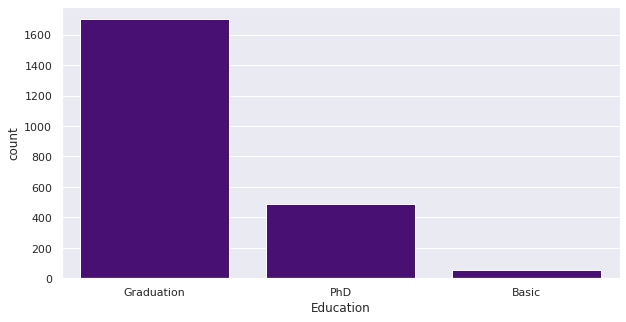

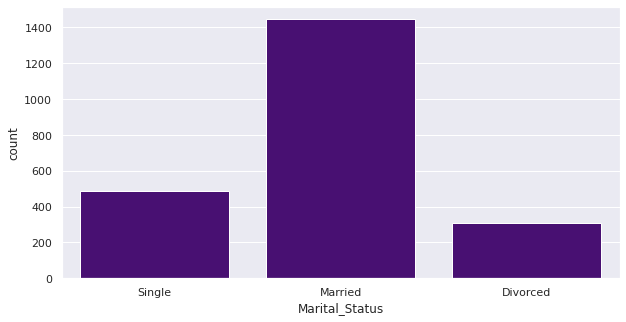

In [23]:
# Ploting all categorical value:
temp = data.select_dtypes(include=object)
for col in temp.columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=temp[col], color='indigo')
  plt.show()

                Total_spends
Marital_Status              
Divorced              198555
Married               863318
Single                295115



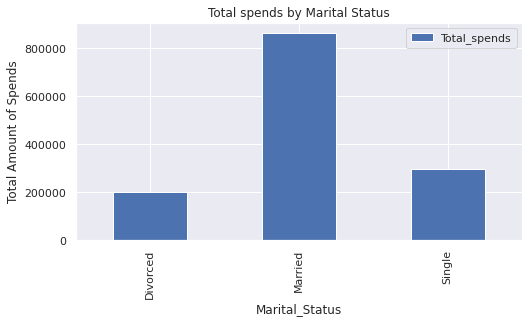

In [24]:
# Maritial Status grouping
temp =data.groupby(['Marital_Status']).sum()['Total_spends'].to_frame()
print(temp)
print()
temp.plot(kind='bar', figsize=(8,4))
plt.ylabel('Total Amount of Spends')
plt.title('Total spends by Marital Status')
plt.show()

Total spends by Income level [ Top = low }

Income_bin
low       1356918
medium          0
high           62
Name: Total_spends, dtype: int64



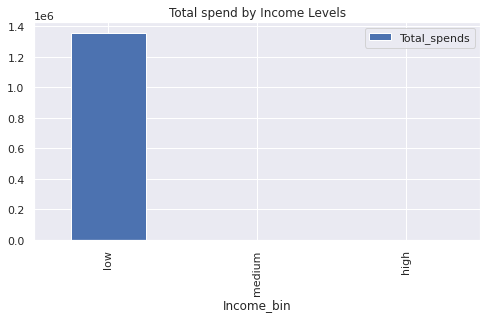

In [25]:
g = data.groupby('Income_bin')
print(g['Total_spends'].sum())
print()
g.sum().plot(kind='bar',
             y='Total_spends',
             title='Total spend by Income Levels',
             figsize=(8,4))
plt.show()

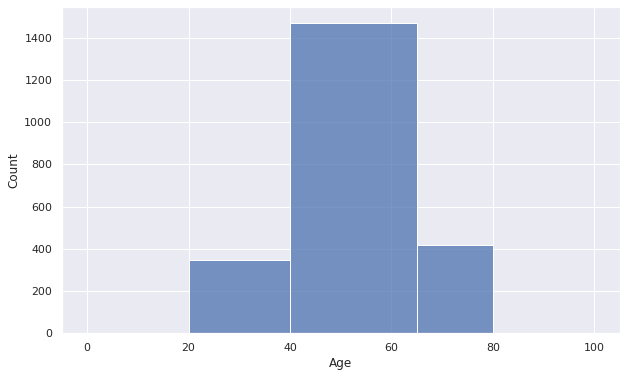

In [26]:
# Age column ploting

plt.figure(figsize=(10,6))
sns.histplot(x=data['Age'],bins=[0,20,40,65,80,100])
plt.show()

# Segmentation by ML clustering

---
*   Clustering by 3 group is appropriate
*   **Cluster 1 (Blue) :**
<br>Royal Customer segement. <br> Its the Topper in total purchase, Response Rate and other product catagory purchase. <br> mostly catalog purchases, low website activity.<br> Higher income ratio
<br> Much have no kids
<br><br>
* **cluster 0 (Green) :**  <br>Regular customer
<br> Higher Recency
<br> two and more kids
<br><br>
* **cluster 2 (Maroon) :** <br> Premimum Customer
<br>Low recency
<br> Lowest Total spending
<br> lowest Income




In [27]:
# Importing module

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [28]:
# Selecting features for Ml clustering for segmentation

data_fix = data[['Recency', 'Total_spends']].values

In [29]:
# Data Normalization by zero mean and unit variancce

scaler = StandardScaler()
data_cluster = scaler.fit_transform(data_fix)

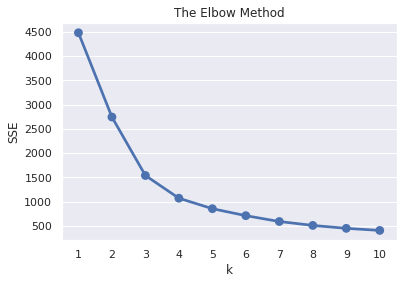

In [30]:
# looking best parameter of k-value that has trend on the next consecutive k
# Elbow method

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cluster)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [31]:
# fit the model 

kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(data_cluster)

# Assigning 
data["Cluster"] = kmean.labels_

In [32]:
# data.groupby('Cluster').min()
# data.groupby('Cluster').max()
data.groupby('Cluster').mean()
# data[data['Cluster'] == 1].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spends
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5447.963338,1968.934260,42182.745912,0.627054,0.582807,74.070796,130.766119,11.337547,55.003793,15.460177,11.865992,28.323641,2.527181,3.318584,1.302149,4.467762,6.064475,0.049305,0.045512,0.006321,0.013906,0.001264,0.011378,0.051833,52.065740,252.757269
1,5553.393136,1967.538222,73743.082692,0.060842,0.366615,52.886115,706.600624,59.043682,423.374415,84.572543,60.776911,78.798752,1.917317,5.630265,5.714509,8.564743,3.617785,0.084243,0.156006,0.234009,0.187207,0.035881,0.004680,0.252730,53.461778,1413.166927
2,5764.076733,1969.685644,45046.998776,0.569307,0.542079,21.676980,154.021040,14.977723,73.115099,21.803218,15.194307,31.800743,2.450495,3.608911,1.571782,4.883663,5.931931,0.086634,0.038366,0.009901,0.016089,0.007426,0.011139,0.162129,51.314356,310.912129


<b>Visualization Customer segmentation</b>

In [33]:
# Visualizing Cluster

# plt.figure(figsize=(12,6))
# sns.lineplot(x='Total_spends', y= 'Recency', hue='Cluster', data=data, palette=['lime', 'blue', 'maroon'])
# plt.show()

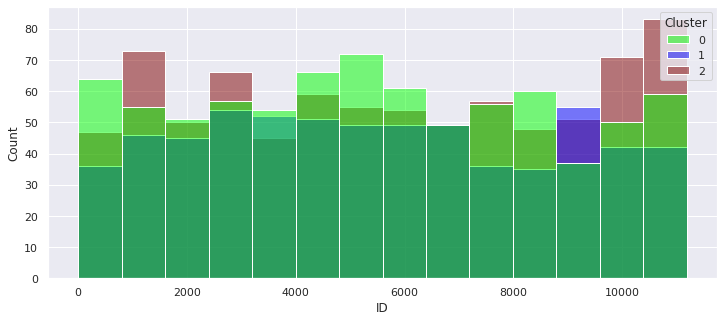

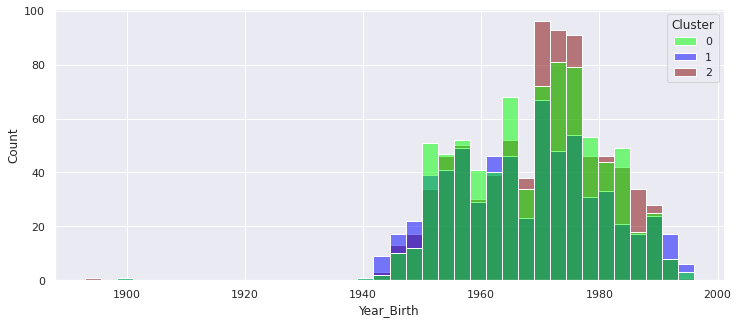

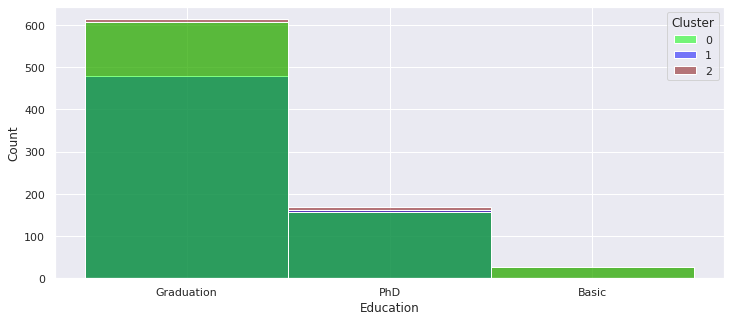

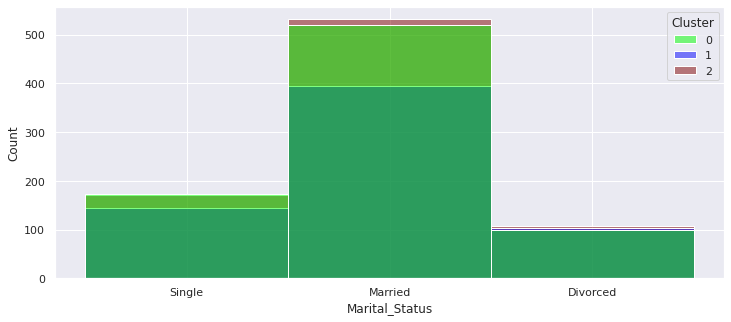

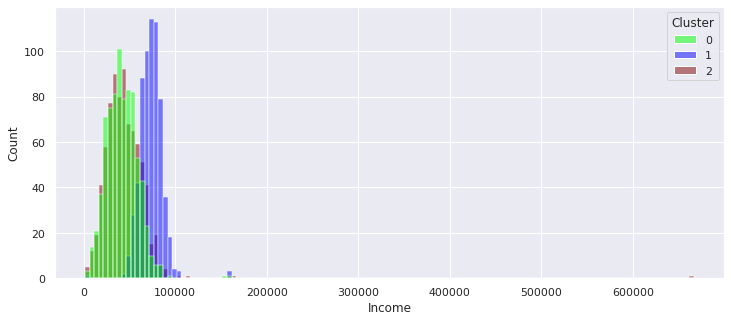

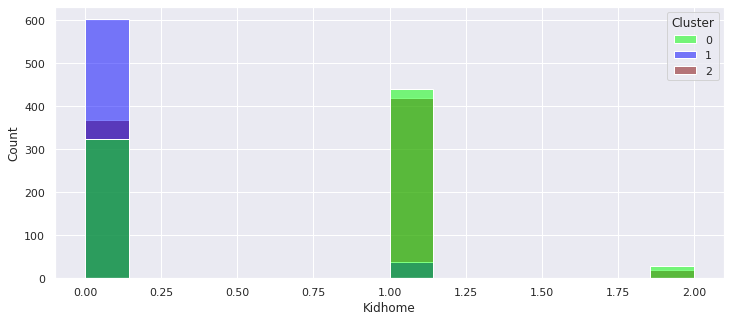

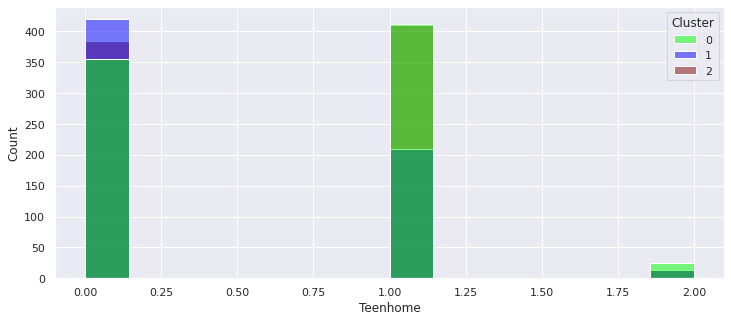

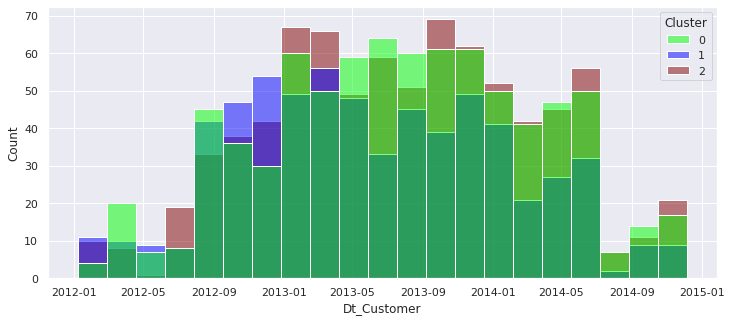

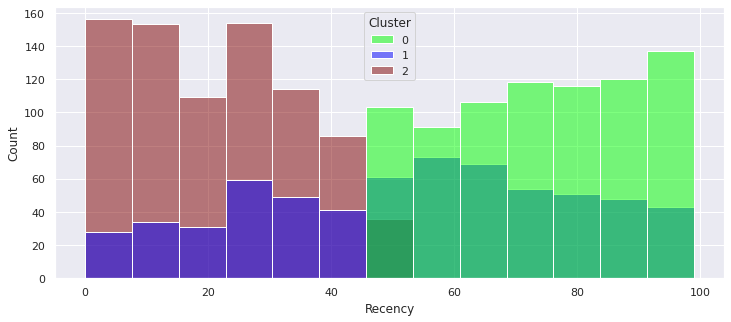

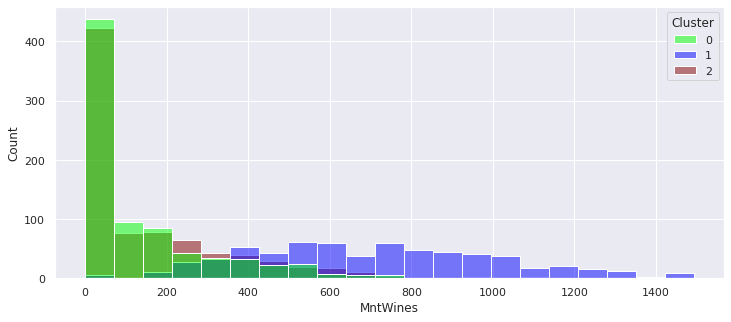

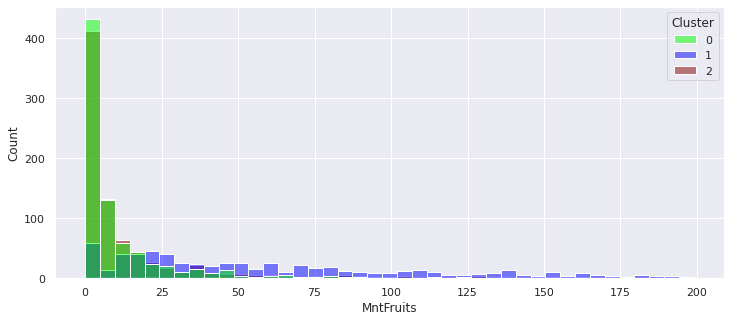

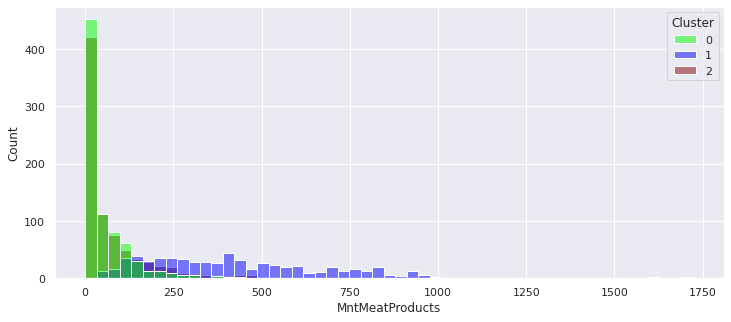

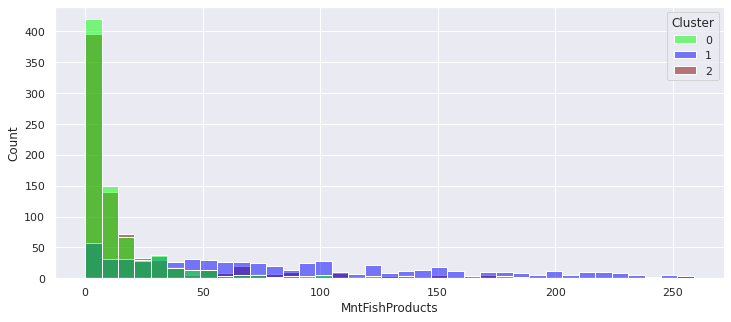

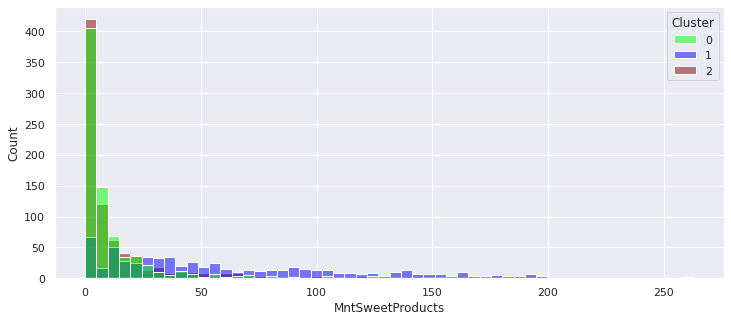

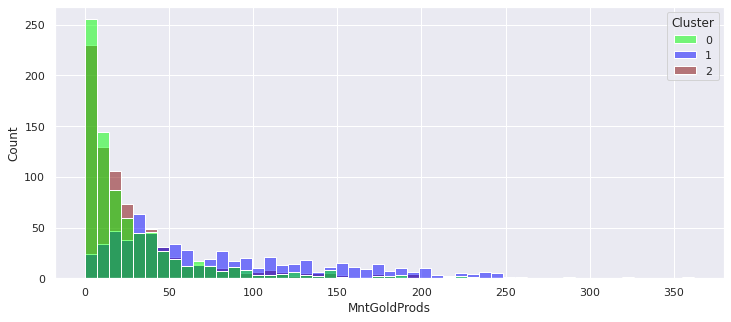

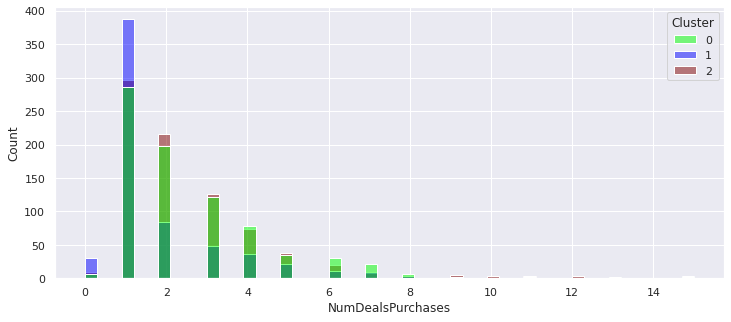

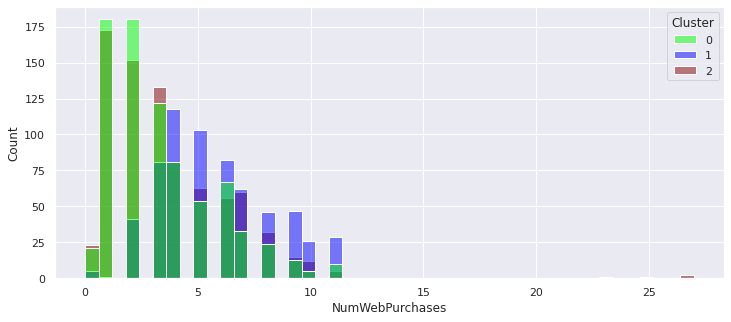

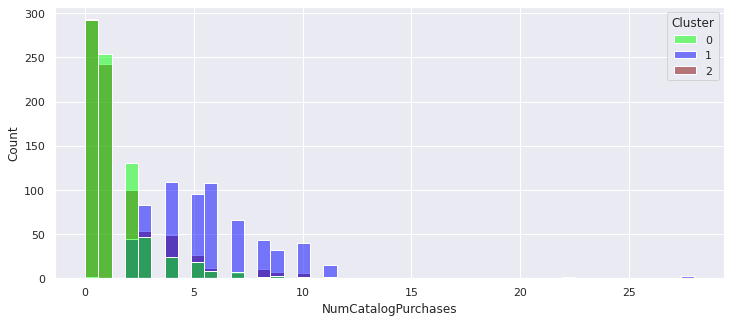

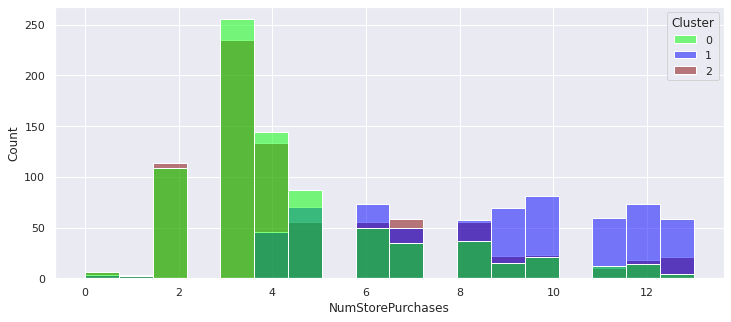

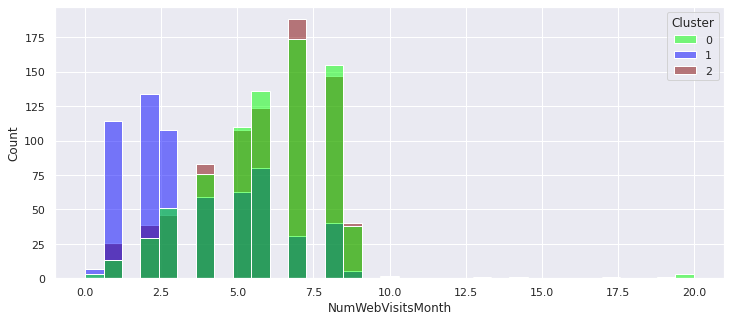

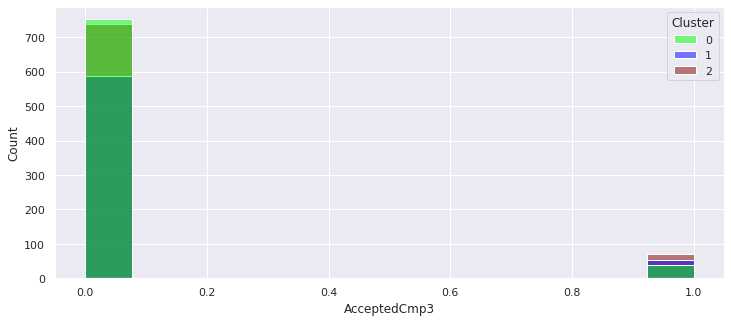

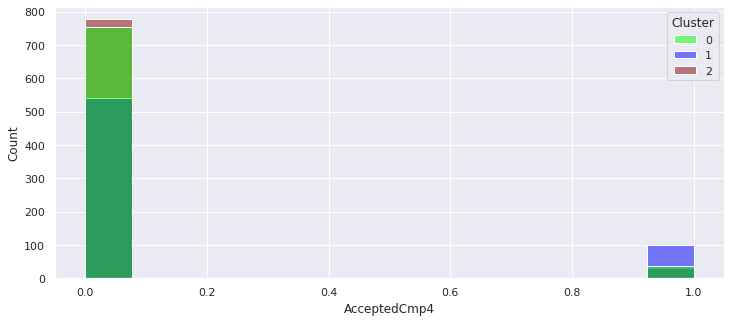

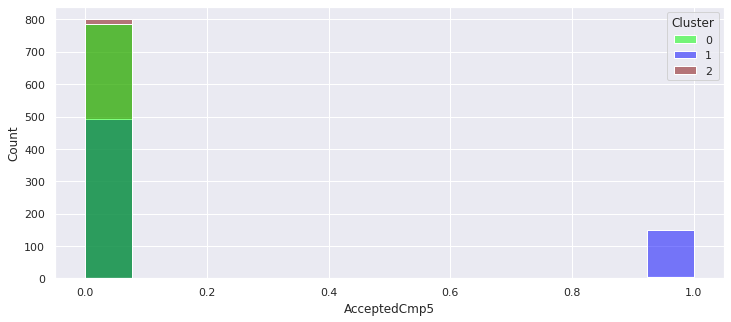

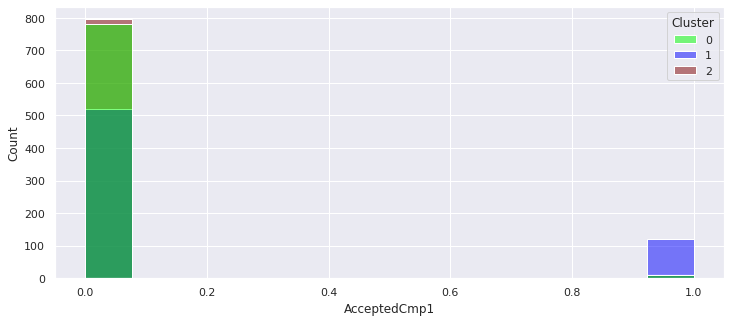

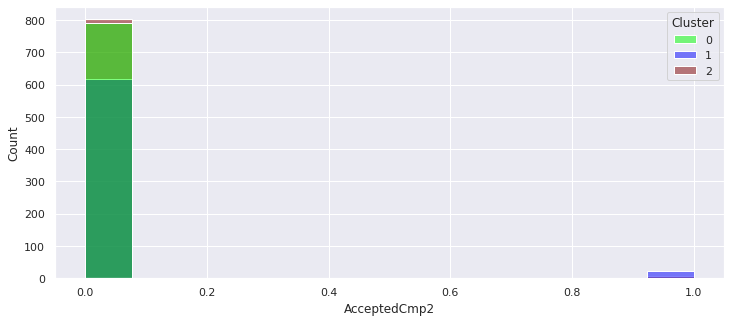

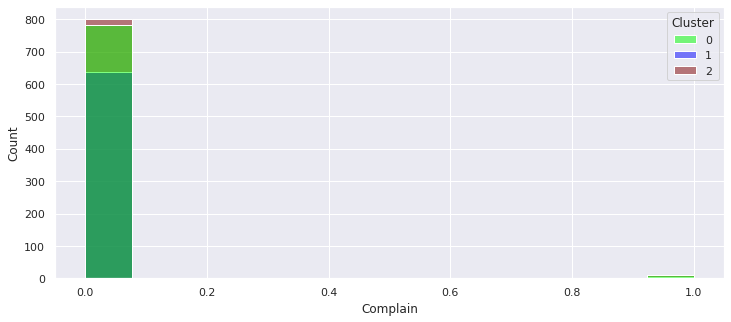

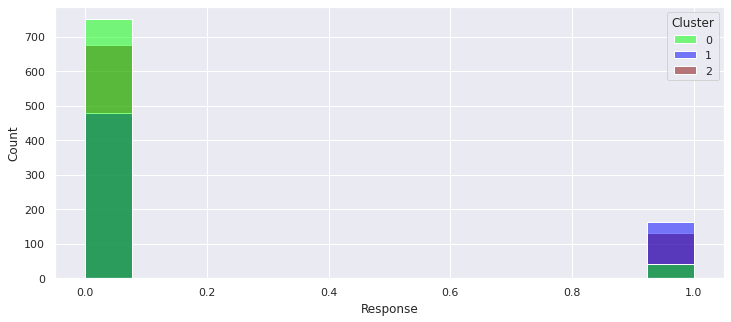

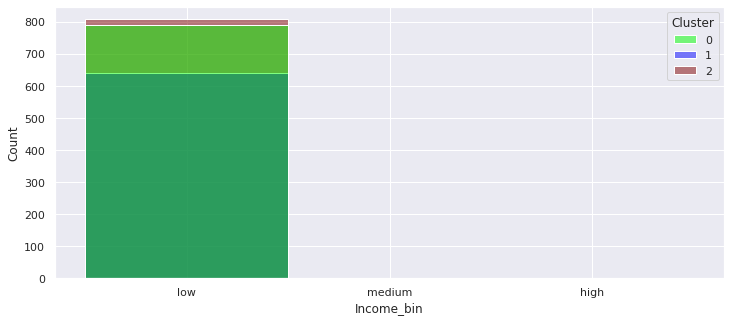

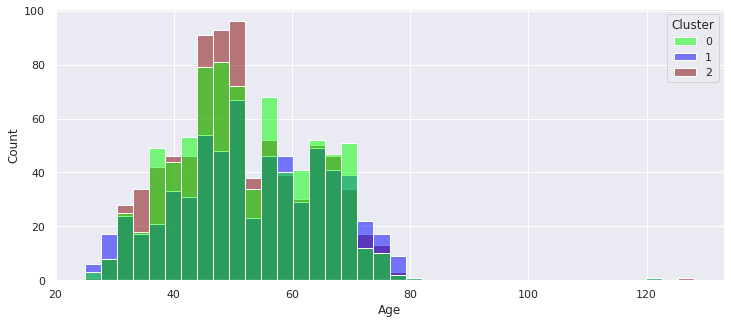

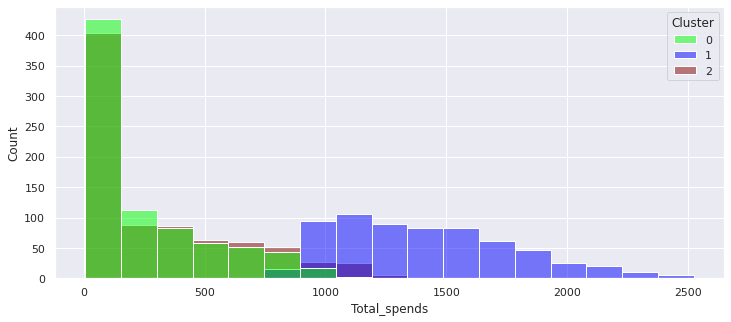

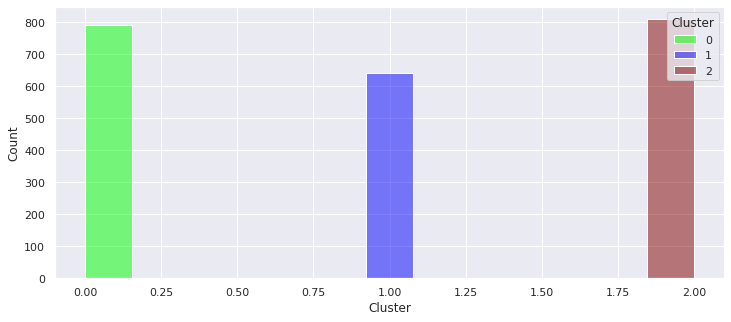

In [34]:
for col in data.columns:
  plt.figure(figsize=(12,5))
  sns.histplot(data=data, x=col, hue='Cluster', palette=['lime', 'blue', 'maroon'])
  plt.show()

# Prediction Model 

---

Predicting Ml model for which customers will respond to next promotion .
<br> For binary value as 1 or 0, we should classified model algorith.
<br> Our target feature is Response 

In [35]:
# label encoding for Education column
data.Education.replace(['Graduation', 'PhD', 'Basic'], [2,3,1], inplace=True)

# encoding for Marital_Status column
one_hot = pd.get_dummies(data['Marital_Status'])
#droping Marital_Status column & joining One_hot 
data.drop('Marital_Status',axis=1,inplace=True)
data = data.join(one_hot)

In [36]:
# for col in data.columns:
#   print(f"{col}: {data[col].unique()}") 
#data.dtypes

According correlation selecting independent feature also as well as dependent feature

In [37]:
# feature selection

#data.corr()['Response']
X = data[['Total_spends','NumCatalogPurchases','NumWebPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Single']]
X = np.asarray(X)

y= data['Response'].values

In [38]:
# normalization by standard scaler

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

## Spliting dataset for training and testing

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1792, 9) (1792,)
Test set: (448, 9) (448,)


## Logistic Regression Modeling 

In [40]:
# importing modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
    
# Modeling
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# predicting test set
yhat_lr = LR.predict(X_test)

# Model Evaluation 
print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       376
           1       0.78      0.25      0.38        72

    accuracy                           0.87       448
   macro avg       0.83      0.62      0.65       448
weighted avg       0.86      0.87      0.84       448



## Support vector machine model (SVM) :

In [41]:
from sklearn import svm
#clf =svm.SVC(kernel= 'linear')
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat_svm = clf.predict(X_test)
print (classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       376
           1       0.68      0.26      0.38        72

    accuracy                           0.86       448
   macro avg       0.78      0.62      0.65       448
weighted avg       0.84      0.86      0.83       448



## confusion matrics
Logistic Regression model performing well. So lets plot confusion matrics:


In [42]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat_lr, labels=[1,0]))

[[ 18  54]
 [  5 371]]


Confusion matrix, without normalization
[[ 18  54]
 [  5 371]]


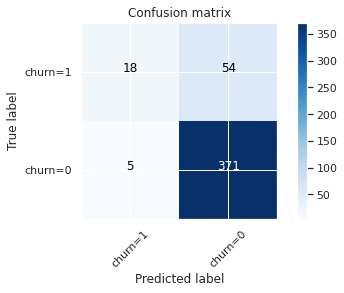

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
